# Not training $A$

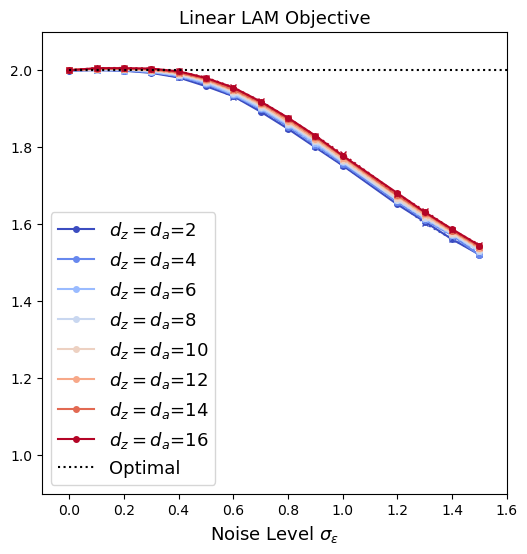

In [ ]:
import matplotlib.pyplot as plt
from itertools import product
import pandas as pd
import numpy as np

record1 = pd.read_csv('scripts/4_2_False_no_noise.csv', index_col=0)
record1 = record1.loc[(record1['iter'] == 10000)]

record2 = pd.read_csv('scripts/4_2_False_no_noise_delta.csv', index_col=0)
record2 = record2.loc[(record2['iter'] == 10000)]

total_record = pd.concat([record1, record2])

plt.figure(figsize=(6, 6))

cmap = plt.get_cmap('coolwarm') 
norm = plt.Normalize(vmin=0, vmax=len(total_record.groupby('da')) - 1) 

counter = 0
for da_value, group in total_record.groupby('da'):
    for delta in [0, -1, 1]:
        sorted_group = group.loc[group['dz'] == group['da'] + delta]
        sorted_group = sorted_group.sort_values('sigma')
        if delta == 0:
            plt.plot(sorted_group['sigma'], - sorted_group['act_mse'] + sorted_group['obs_mse'] + sorted_group['noi_mse'], 
                label=f'$d_z=d_a$={da_value}', marker='o', markersize=4, color=cmap(norm(counter)))
        elif delta == 1:
            plt.plot(sorted_group['sigma'], - sorted_group['act_mse'] + sorted_group['obs_mse'] + sorted_group['noi_mse'], 
                ls=':', marker='x', markersize=4, color=cmap(norm(counter)))
        elif delta == -1:
            plt.plot(sorted_group['sigma'], - sorted_group['act_mse'] + sorted_group['obs_mse'] + sorted_group['noi_mse'], 
                ls='-.', marker='^', markersize=4, color=cmap(norm(counter)))
    counter += 1

plt.plot([0, 2], [2, 2], 'k:', label='Optimal')

plt.ylim([0.9, 2.1])
plt.xlim([-0.1, 1.6])
plt.title(r'Linear LAM Objective', fontsize=13)
plt.xlabel('Noise Level $\sigma_\epsilon$', fontsize=13)
plt.legend(fontsize=13)

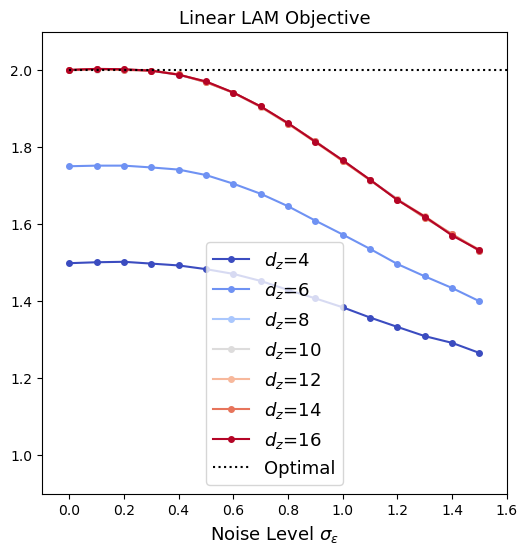

In [6]:
import matplotlib.pyplot as plt
from itertools import product
import pandas as pd
import numpy as np

total_record = pd.read_csv('scripts/4_2_False_no_noise_new.csv', index_col=0)
total_record = total_record.loc[total_record['iter'] == 10000]

plt.figure(figsize=(6, 6))

cmap = plt.get_cmap('coolwarm') 
norm = plt.Normalize(vmin=0, vmax=len(total_record.groupby('dz')) - 1) 

counter = 0
for dz_value, group in total_record.groupby('dz'):
    sorted_group = group.sort_values('sigma')
    plt.plot(sorted_group['sigma'], - sorted_group['act_mse'] + sorted_group['obs_mse'] + sorted_group['noi_mse'], 
        label=f'$d_z$={dz_value}', marker='o', markersize=4, color=cmap(norm(counter)))
    counter += 1

plt.plot([0, 2], [2, 2], 'k:', label='Optimal')

plt.ylim([0.9, 2.1])
plt.xlim([-0.1, 1.6])
plt.title(r'Linear LAM Objective', fontsize=13)
plt.xlabel('Noise Level $\sigma_\epsilon$', fontsize=13)
plt.legend(fontsize=13)

# Only predict action based on $\hat{O} - O$

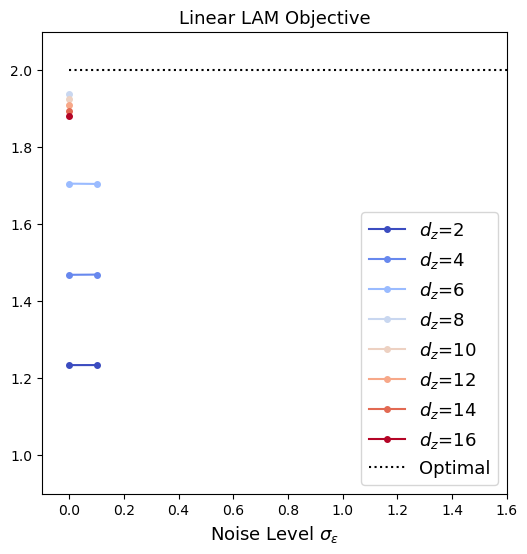

In [1]:
import matplotlib.pyplot as plt
from itertools import product
import pandas as pd
import numpy as np

total_record = pd.read_csv('scripts/4_2_learnATrue_CDzeroFalse_psdactionTrue_nonoiseevalTrue.csv', index_col=0)
total_record = total_record.loc[total_record['iter'] == 10000]

plt.figure(figsize=(6, 6))

cmap = plt.get_cmap('coolwarm') 
norm = plt.Normalize(vmin=0, vmax=len(total_record.groupby('dz')) - 1) 

counter = 0
for dz_value, group in total_record.groupby('dz'):
    sorted_group = group.sort_values('sigma')
    plt.plot(sorted_group['sigma'], - sorted_group['act_mse'] + sorted_group['obs_mse'] + sorted_group['noi_mse'], 
        label=f'$d_z$={dz_value}', marker='o', markersize=4, color=cmap(norm(counter)))
    counter += 1

plt.plot([0, 2], [2, 2], 'k:', label='Optimal')

plt.ylim([0.9, 2.1])
plt.xlim([-0.1, 1.6])
plt.title(r'Linear LAM Objective', fontsize=13)
plt.xlabel('Noise Level $\sigma_\epsilon$', fontsize=13)
plt.legend(fontsize=13)

In [2]:
total_record

,do,da,dz,sigma,iter,recon_loss,act_mse,obs_mse,noi_mse
10,128,8,2,0.0,10000,0.048072,0.750713,0.984804,1.0
21,128,8,4,0.0,10000,0.032233,0.501299,0.969933,1.0
32,128,8,6,0.0,10000,0.016132,0.248904,0.954336,1.0
43,128,8,8,0.0,10000,0.000136,0.001080,0.940239,1.0
54,128,8,10,0.0,10000,0.000080,0.000441,0.924743,1.0
65,128,8,12,0.0,10000,0.000161,0.000568,0.909206,1.0
76,128,8,14,0.0,10000,0.000136,0.000381,0.895240,1.0
87,128,8,16,0.0,10000,0.000065,0.000103,0.880211,1.0
98,128,8,2,0.1,10000,0.048235,0.750641,0.984791,1.0
109,128,8,4,0.1,10000,0.032416,0.500733,0.969891,1.0


# Predict action/obs/noise based on $\hat{O} - O$

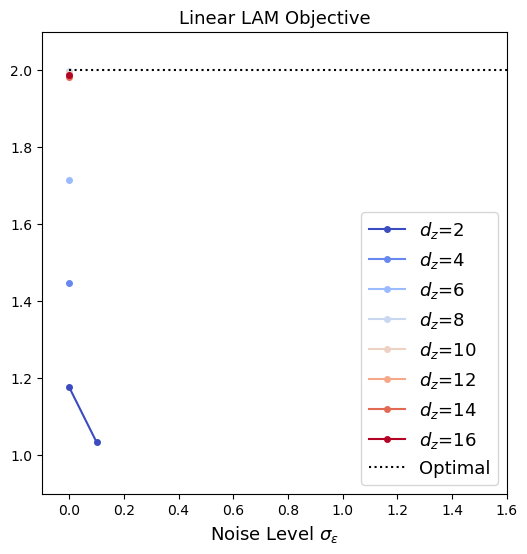

In [3]:
import matplotlib.pyplot as plt
from itertools import product
import pandas as pd
import numpy as np

total_record = pd.read_csv('scripts/4_2_learnATrue_CDzeroFalse_psdlatentTrue_nonoiseevalTrue.csv', index_col=0)
total_record = total_record.loc[total_record['iter'] == 10000]

plt.figure(figsize=(6, 6))

cmap = plt.get_cmap('coolwarm') 
norm = plt.Normalize(vmin=0, vmax=len(total_record.groupby('dz')) - 1) 

counter = 0
for dz_value, group in total_record.groupby('dz'):
    sorted_group = group.sort_values('sigma')
    plt.plot(sorted_group['sigma'], - sorted_group['act_mse'] + sorted_group['obs_mse'] + sorted_group['noi_mse'], 
        label=f'$d_z$={dz_value}', marker='o', markersize=4, color=cmap(norm(counter)))
    counter += 1

plt.plot([0, 2], [2, 2], 'k:', label='Optimal')

plt.ylim([0.9, 2.1])
plt.xlim([-0.1, 1.6])
plt.title(r'Linear LAM Objective', fontsize=13)
plt.xlabel('Noise Level $\sigma_\epsilon$', fontsize=13)
plt.legend(fontsize=13)